In [82]:
import os
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
import spacy
import pandas as pd
import numpy as np
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
from multiprocessing import Process, Lock
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import tensorflow_hub as hub
import tensorflow_text
warnings.filterwarnings('ignore')

In [83]:
TRANSCRIBE_PATH = "/media/storage/alekseychuk/LDA/normalized_recognition"


In [84]:
data_words = []
data_strings = []
file_names = []

for folder in os.listdir(TRANSCRIBE_PATH):
    if not folder.startswith("."):
        print("folder: " + folder)
        folder_path = TRANSCRIBE_PATH + '/' + folder
        #print("path: " + folder_path)
        for text_name in os.listdir(folder_path):
            #print("text_name: " + text_name)
            text_path = folder_path + '/' + text_name
            #print("text_path: " + text_path)
            f = open(text_path, 'r')
            words = f.read()
            if words:
                split = words.split()
                if len(split) > 100:
                    data_words.append(split)
                    data_strings.append(words)
                    file_names.append(text_name)

folder: 1579
folder: 1564
folder: 1541
folder: 1604
folder: 1601
folder: 1581
folder: 1573
folder: 1554
folder: 1600
folder: 1597
folder: 1569
folder: 1552
folder: 1585
folder: 1558
folder: 1575
folder: 1546
folder: 1588
folder: 1565
folder: 1570
folder: 1598
folder: 1578
folder: 1567
folder: 1584
folder: 1599
folder: 1547
folder: 1592
folder: 1595
folder: 1571
folder: 1596
folder: 1553
folder: 1572
folder: 1568
folder: 1605
folder: 1582
folder: 1566
folder: 1576
folder: 1591
folder: 1590
folder: 1563
folder: 1549
folder: 1555
folder: 1589
folder: 1557
folder: 1545
folder: 1593
folder: 1550
folder: 1543
folder: 1602
folder: 1603
folder: 1583
folder: 1542
folder: 1577
folder: 1548
folder: 1587
folder: 1561
folder: 1544
folder: 1580
folder: 1594
folder: 1586
folder: 1574
folder: 1551
folder: 1562
folder: 1556


In [85]:
len(file_names)

62072

In [89]:
for j, text in enumerate(data_words):
    for i, word in enumerate(data_words[j]):
        if word in ('диадох', 'виадук'):
            data_words[j][i] = 'диадок'

In [90]:
# data_words[2]

In [91]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
 


In [11]:
bigram[data_words[2]]

['спасибо',
 'пятнадцать',
 'восемьдесят',
 'ноль',
 'семь',
 'евгений',
 'оставлять',
 'евгений',
 'евгений',
 'добрый',
 'день',
 'максим',
 'максим',
 'здравствуйте',
 'подсказать',
 'пожалуйста',
 'обновление',
 'контур',
 'экстерн',
 'лайта',
 'баланс',
 'глава',
 'удаваться',
 'проверить',
 'документ',
 'спешить',
 'использование',
 'кэйт',
 'эклектичность',
 'инициализация',
 'ошибка',
 'нужный',
 'ваш',
 'электронный',
 'почта',
 'наш',
 'сайт',
 'нужно',
 'обновить',
 'это',
 'ошибка',
 'немножко',
 'другой',
 'версия',
 'определённый',
 'версия',
 'понять',
 'ой',
 'тот',
 'женщина',
 'бабочка',
 'который',
 'собака',
 'би',
 'дефис',
 'френд',
 'точка_ру',
 'бенефис',
 'далёкий',
 'френд',
 'друг',
 'точка_ру',
 'прийти',
 'утро',
 'обновление',
 'побыть',
 'сразу',
 'правительство',
 'группа',
 'неправильно',
 'другой',
 'прислать',
 'свой',
 'место',
 'ще',
 'момент',
 'давать',
 'другой',
 'точка',
 'собака',
 'точка_ру',
 'часто',
 'минутка',
 'просить',
 'гм_гм',
 'нали

In [18]:
bigram.export_phrases()

{'э_э': 447.04985859424403,
 'набрать_тоновый': 183.25635746987092,
 'тоновый_режим': 230.62026424790773,
 'режим_соединять': 111.94859788277702,
 'ожидать_соединение': 223.17542288219875,
 'налог_имущество': 223.69087400461,
 'отчётный_период': 301.48269028347397,
 'индивидуальный_предприниматель': 3672.9742310528827,
 'перед_я': 358.17588608401036,
 'авансовый_платёж': 998.3622299401245,
 'помощь_дистанционный': 128.8476600002133,
 'дистанционный_помощь': 279.08749387762134,
 'четвёртый_квартал': 109.32696927572734,
 'центр_электромонтаж': 150.12379046649764,
 'фёдор_фёдор': 154.63293834000206,
 'английский_буква': 125.14618879537237,
 'б_б': 106.84508455708509,
 'собака_отжимать': 293.3357253645899,
 'дабла_ю': 4967.1492328104605,
 'повторный_попытка': 209.41983930491335,
 'повторить_попытка': 245.49093671629922,
 'отдел_продажа': 160.6779596343299,
 'санкт-петербургский_филиал': 503.9416296877783,
 'точка_ру': 237.79963381740998,
 'крайний_мера': 939.4081980404185,
 'аля_аля': 210.

In [92]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
bigram_mod[data_words[2]]

['спасибо',
 'пятнадцать',
 'восемьдесят',
 'ноль',
 'семь',
 'евгений',
 'оставлять',
 'евгений',
 'евгений',
 'добрый',
 'день',
 'максим',
 'максим',
 'здравствуйте',
 'подсказать',
 'пожалуйста',
 'обновление',
 'контур',
 'экстерн',
 'лайта',
 'баланс',
 'глава',
 'удаваться',
 'проверить',
 'документ',
 'спешить',
 'использование',
 'кэйт',
 'эклектичность',
 'инициализация',
 'ошибка',
 'нужный',
 'ваш',
 'электронный',
 'почта',
 'наш',
 'сайт',
 'нужно',
 'обновить',
 'это',
 'ошибка',
 'немножко',
 'другой',
 'версия',
 'определённый',
 'версия',
 'понять',
 'ой',
 'тот',
 'женщина',
 'бабочка',
 'который',
 'собака',
 'би',
 'дефис',
 'френд',
 'точка_ру',
 'бенефис',
 'далёкий',
 'френд',
 'друг',
 'точка_ру',
 'прийти',
 'утро',
 'обновление',
 'побыть',
 'сразу',
 'правительство',
 'группа',
 'неправильно',
 'другой',
 'прислать',
 'свой',
 'место',
 'ще',
 'момент',
 'давать',
 'другой',
 'точка',
 'собака',
 'точка_ру',
 'часто',
 'минутка',
 'просить',
 'гм_гм',
 'нали

In [111]:
bigram_mod.phrasegrams

{'э_э': 447.04985859424403,
 'набрать_тоновый': 183.25635746987092,
 'тоновый_режим': 230.62026424790773,
 'режим_соединять': 111.94859788277702,
 'ожидать_соединение': 223.17542288219875,
 'налог_имущество': 223.69087400461,
 'отчётный_период': 301.48269028347397,
 'индивидуальный_предприниматель': 3672.9742310528827,
 'перед_я': 358.17588608401036,
 'авансовый_платёж': 998.3622299401245,
 'помощь_дистанционный': 128.8476600002133,
 'дистанционный_помощь': 279.08749387762134,
 'четвёртый_квартал': 109.32696927572734,
 'центр_электромонтаж': 150.12379046649764,
 'фёдор_фёдор': 154.63293834000206,
 'английский_буква': 125.14618879537237,
 'б_б': 106.84508455708509,
 'собака_отжимать': 293.3357253645899,
 'дабла_ю': 4967.1492328104605,
 'повторный_попытка': 209.41983930491335,
 'повторить_попытка': 245.49093671629922,
 'отдел_продажа': 160.6779596343299,
 'санкт-петербургский_филиал': 503.9416296877783,
 'точка_ру': 237.79963381740998,
 'крайний_мера': 939.4081980404185,
 'аля_аля': 210.

In [93]:
trigram = gensim.models.Phrases(bigram[data_words], threshold=100) 

In [94]:
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [21]:
trigram[data_words[1]]

['николаевич',
 'заработать',
 'компьютер',
 'компьютер',
 'заработать',
 'загрузить',
 'джимми',
 'вэйл',
 'зайти',
 'посмотреть',
 'врать',
 'министр',
 'ещё',
 'что-то',
 'смотреть',
 'попытаться',
 'зарегистрировать',
 'новый',
 'почта',
 'точка',
 'барни',
 'два',
 'тысяча',
 'восемь',
 'собака',
 'зима',
 'называть',
 'зарегистрироваться',
 'это',
 'задавать',
 'дать',
 'система',
 'соответственно',
 'возможно',
 'где-то',
 'попытаться',
 'ещё',
 'сам',
 'один',
 'компьютер',
 'забыть',
 'пароль',
 'возможно',
 'просто',
 'регистр',
 'менять',
 'где-то',
 'просто',
 'обижаться',
 'значит',
 'делать',
 'вход',
 'сервис',
 'журнал',
 'бухгалтерия',
 'видеть',
 'окошечко',
 'электронный',
 'почта',
 'пароль',
 'почта',
 'джим',
 'минутка',
 'смотреть',
 'внимательно',
 'пост',
 'зарегистрировать',
 'соответственно',
 'мы',
 'нужно',
 'вы',
 'кто',
 'по-другому',
 'поступить',
 'почта',
 'уникальный',
 'ещё',
 'какой-нибудь',
 'почта',
 'пользоваться',
 'этот',
 'нефть',
 'ещё',
 'до

In [168]:
trigram_mod.phrasegrams

{'набрать_тоновый': 135031.23236763236,
 'сотрудник_набрать_тоновый': 27643.091359151855,
 'режим_соединять': 4331.219549391207,
 'набрать_тоновый_режим_соединять': 4630.786268378293,
 'ожидать_соединение': 8644.541141426924,
 'пожалуйста_ожидать_соединение': 284.73304521856505,
 'налог_имущество': 520.4120252829789,
 'отчётный_период': 736.1771099009161,
 'индивидуальный_предприниматель': 33529.043038642456,
 'перед_я': 3111.6805158118714,
 'авансовый_платёж': 3142.1582340095247,
 'помощь_дистанционный': 879.4779404616972,
 'помощь_помощь_дистанционный': 101.40919109405284,
 'система_налогообложение': 114.05350950224135,
 'четвёртый_квартал': 175.56912078765038,
 'кантин_июль': 229.24111053463483,
 'центр_электромонтаж': 1716.9963224750754,
 'фёдор_фёдор': 269.1039064049177,
 'английский_буква': 192.2660103010908,
 'б_б': 121.42590132618128,
 'кол_центр': 160.961029818282,
 'крайний_случай': 131.8422304955276,
 'собака_отжимать': 1168.6319175341287,
 'дабла_ю': 131029.47586206897,
 'п

In [117]:
trigram_mod[bigram_mod[data_words[2]]]

['спасибо',
 'пятнадцать',
 'восемьдесят',
 'ноль',
 'семь',
 'евгений',
 'оставлять',
 'евгений',
 'евгений',
 'добрый',
 'день',
 'максим',
 'максим',
 'здравствуйте',
 'подсказать',
 'пожалуйста',
 'обновление',
 'контур',
 'экстерн',
 'лайта',
 'баланс',
 'глава',
 'удаваться',
 'проверить',
 'документ',
 'спешить',
 'использование',
 'кэйт',
 'эклектичность',
 'инициализация',
 'ошибка',
 'нужный',
 'ваш',
 'электронный',
 'почта',
 'наш',
 'сайт',
 'нужно',
 'обновить',
 'это',
 'ошибка',
 'немножко',
 'другой',
 'версия',
 'определённый',
 'версия',
 'понять',
 'ой',
 'тот',
 'женщина',
 'бабочка',
 'который',
 'собака',
 'би',
 'дефис',
 'френд',
 'точка_ру',
 'бенефис',
 'далёкий',
 'френд',
 'друг',
 'точка_ру',
 'прийти',
 'утро',
 'обновление',
 'побыть',
 'сразу',
 'правительство',
 'группа',
 'неправильно',
 'другой',
 'прислать',
 'свой',
 'место',
 'ще',
 'момент',
 'давать',
 'другой',
 'точка',
 'собака_точка_ру',
 'часто',
 'минутка',
 'просить',
 'гм_гм',
 'налить',

In [95]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [96]:
data_words_bigrams = make_bigrams(data_words)

In [24]:
len(data_words_bigrams)

62072

In [97]:
data_words_trigrams = make_trigrams(data_words)

In [26]:
data_words_trigrams[2]

['спасибо',
 'пятнадцать',
 'восемьдесят',
 'ноль',
 'семь',
 'евгений',
 'оставлять',
 'евгений',
 'евгений',
 'добрый',
 'день',
 'максим',
 'максим',
 'здравствуйте',
 'подсказать',
 'пожалуйста',
 'обновление',
 'контур',
 'экстерн',
 'лайта',
 'баланс',
 'глава',
 'удаваться',
 'проверить',
 'документ',
 'спешить',
 'использование',
 'кэйт',
 'эклектичность',
 'инициализация',
 'ошибка',
 'нужный',
 'ваш',
 'электронный',
 'почта',
 'наш',
 'сайт',
 'нужно',
 'обновить',
 'это',
 'ошибка',
 'немножко',
 'другой',
 'версия',
 'определённый',
 'версия',
 'понять',
 'ой',
 'тот',
 'женщина',
 'бабочка',
 'который',
 'собака',
 'би',
 'дефис',
 'френд',
 'точка_ру',
 'бенефис',
 'далёкий',
 'френд',
 'друг',
 'точка_ру',
 'прийти',
 'утро',
 'обновление',
 'побыть',
 'сразу',
 'правительство',
 'группа',
 'неправильно',
 'другой',
 'прислать',
 'свой',
 'место',
 'ще',
 'момент',
 'давать',
 'другой',
 'точка',
 'собака_точка_ру',
 'часто',
 'минутка',
 'просить',
 'гм_гм',
 'налить',

In [59]:
len(data_words_trigrams)

62072

## Лемматизация

In [174]:
# Initialize spacy 'ru_core_news_sm' model, keeping only tagger component (for efficiency)
# !python3 -m spacy download ru_core_news_sm
nlp = spacy.load('ru_core_news_sm', disable=['parser', 'ner'])

In [177]:

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         data_lemmatized.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

# data_lemmatized = []

    
def lemmatization(texts, lock):
    output = []
    try:
        lock.acquire()
        print('lemmatization started. len=', len(texts))
    finally:
        lock.release()
    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    with open("data_lemmatized.txt", "a") as txt_file:
        for line in output:
            txt_file.write(" ".join(line) + "\n")

In [178]:
with open("data_lemmatized.txt", "a") as txt_file:
    txt_file.truncate(0)
    
length = len(data_words_trigrams)
ranges = np.linspace(0, length, os.cpu_count())
if __name__ == '__main__':
    processes = []
    lock = Lock()

    p1 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[:int(ranges[1])], lock))
    processes.append(p1)
    p1.start()
    print('Process 1 started.')
    
    p2 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[1]):int(ranges[2])], lock))
    processes.append(p2)
    p2.start()
    print('Process 2 started.')
    
    p3 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[2]):int(ranges[3])], lock))
    processes.append(p3)
    p3.start()
    print('Process 3 started.')
    
    p4 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[3]):int(ranges[4])], lock))
    processes.append(p4)
    p4.start()
    print('Process 4 started.')
    
    p5 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[4]):int(ranges[5])], lock))
    processes.append(p5)
    p5.start()
    print('Process 5 started.')
    
    p6 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[5]):int(ranges[6])], lock))
    processes.append(p6)
    p6.start()
    print('Process 6 started.')
    
    p7 = multiprocessing.Process(target=lemmatization, args=(data_words_trigrams[int(ranges[6]):], lock))
    processes.append(p7)
    p7.start()
    print('Process 7 started.')
    
    
    for process in processes:
        process.join()


Process 1 started.
lemmatization started. len= 8867Process 2 started.

lemmatization started. len= Process 3 started.
8867
lemmatization started. len= 8868Process 4 started.

lemmatization started. len=Process 5 started.
 8867Process 6 started.

lemmatization started. len= 8868
Process 7 started.
lemmatization started. len= 8867
lemmatization started. len= 8868


In [99]:
# with open("data_lemmatized.txt", "w") as txt_file:
#     for line in data_lemmatized:
#         txt_file.write(" ".join(line) + "\n") 

In [2]:
data_lemmatized2 = []
with open("data_lemmatized.txt", "r") as txt_file:
    for line in txt_file:
        data_lemmatized2.append(line.split(' ')) 

In [3]:
len(data_lemmatized2)

62072

In [128]:
data_lemmatized2[2]

['джонсон_форум',
 'прийти',
 'лёшка',
 'поддержка',
 'пожалуйста',
 'добрый',
 'готовый_назвать_специалист',
 'энэн',
 'организация',
 'формула',
 'вырастить',
 'алёна',
 'здравствовать',
 'брать',
 'трубочка',
 'леонид',
 'телефон',
 'просить',
 'компания',
 'статус',
 'смениться_гендиректор',
 'нужный',
 'желательно',
 'быстрый',
 'оформить',
 'триста',
 'тринадцать',
 'вращать',
 'марин',
 'выпуск',
 'руководитель',
 'поменяться',
 'мочь',
 'сказать',
 'возможный',
 'поменяться',
 'получиться',
 'сделать',
 'понять',
 'сказать',
 'прерывать',
 'беседа',
 'посмотреть',
 'мочь',
 'попробовать',
 'фокус',
 'секундочка',
 'подождать',
 'триста',
 'пока',
 'старый',
 'поменять',
 'руководитель',
 'выписка',
 'сформировать',
 'форма',
 'ален',
 'род',
 'ага',
 'вопрос',
 'понять',
 'маленький',
 'вопрос',
 'первый',
 'день',
 '-',
 'два',
 'сделаться',
 'горничный',
 'второй',
 'вопрос',
 'давать',
 'отчётность',
 'соответственно',
 'ещё',
 'старый',
 'подписывать',
 'правильно',
 'прави

### Обход лемматизации

In [98]:
data_lemmatized2 = data_words_trigrams

### Формирование корпуса

In [99]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized2)
id2word.filter_extremes(no_below=2, no_above=1.0)
# Create Corpus
texts = data_lemmatized2
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [144]:
[id2word[i] for i in range(114) ]

['-',
 'август',
 'акт',
 'аншлаг',
 'беспокоиться',
 'большой',
 'бухгалтерия',
 'вести',
 'вечер',
 'виктория',
 'вкрадчивый',
 'вместе',
 'водитель',
 'возводить',
 'возможно',
 'вонять',
 'вообще',
 'вопрос',
 'врубаться',
 'всякий_случай',
 'второй',
 'вход',
 'вынимать',
 'выяснить',
 'говорить',
 'давно',
 'дать',
 'двенадцатый',
 'девочка',
 'делать',
 'дело',
 'договор',
 'договорчик',
 'документ',
 'допустить',
 'дробь',
 'ещё',
 'живой',
 'забрать',
 'занимать',
 'записывать',
 'здравствовать',
 'знать',
 'значить',
 'как',
 'клиент',
 'конец',
 'контракт',
 'контролировать',
 'контур',
 'конченый',
 'корма',
 'кофе',
 'красиво\n',
 'красота',
 'купить',
 'куча',
 'ладный',
 'лингвистический',
 'линия',
 'массаж',
 'машина',
 'место',
 'месяц',
 'метро_дмитровский',
 'мечта',
 'модерновый',
 'мочь',
 'навстречу',
 'написать',
 'наслать',
 'наталья',
 'начать',
 'новый',
 'нравиться',
 'нужный',
 'обратить',
 'общаться',
 'ольга',
 'оплата',
 'оплатить',
 'оплачивать',
 'ориг

In [131]:
corpus

[[(0, 1),
  (1, 2),
  (2, 4),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 8),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 6),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 3),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [5]:
id2word[2]

'борис'

In [182]:
# with open('corpus.pkl', 'wb') as f:
#     pickle.dump(corpus, f)

In [23]:
# with open("corpus.pkl", "rb") as file_to_read:
#     corpus = pickle.load(file_to_read)

## Визуализация длины документов

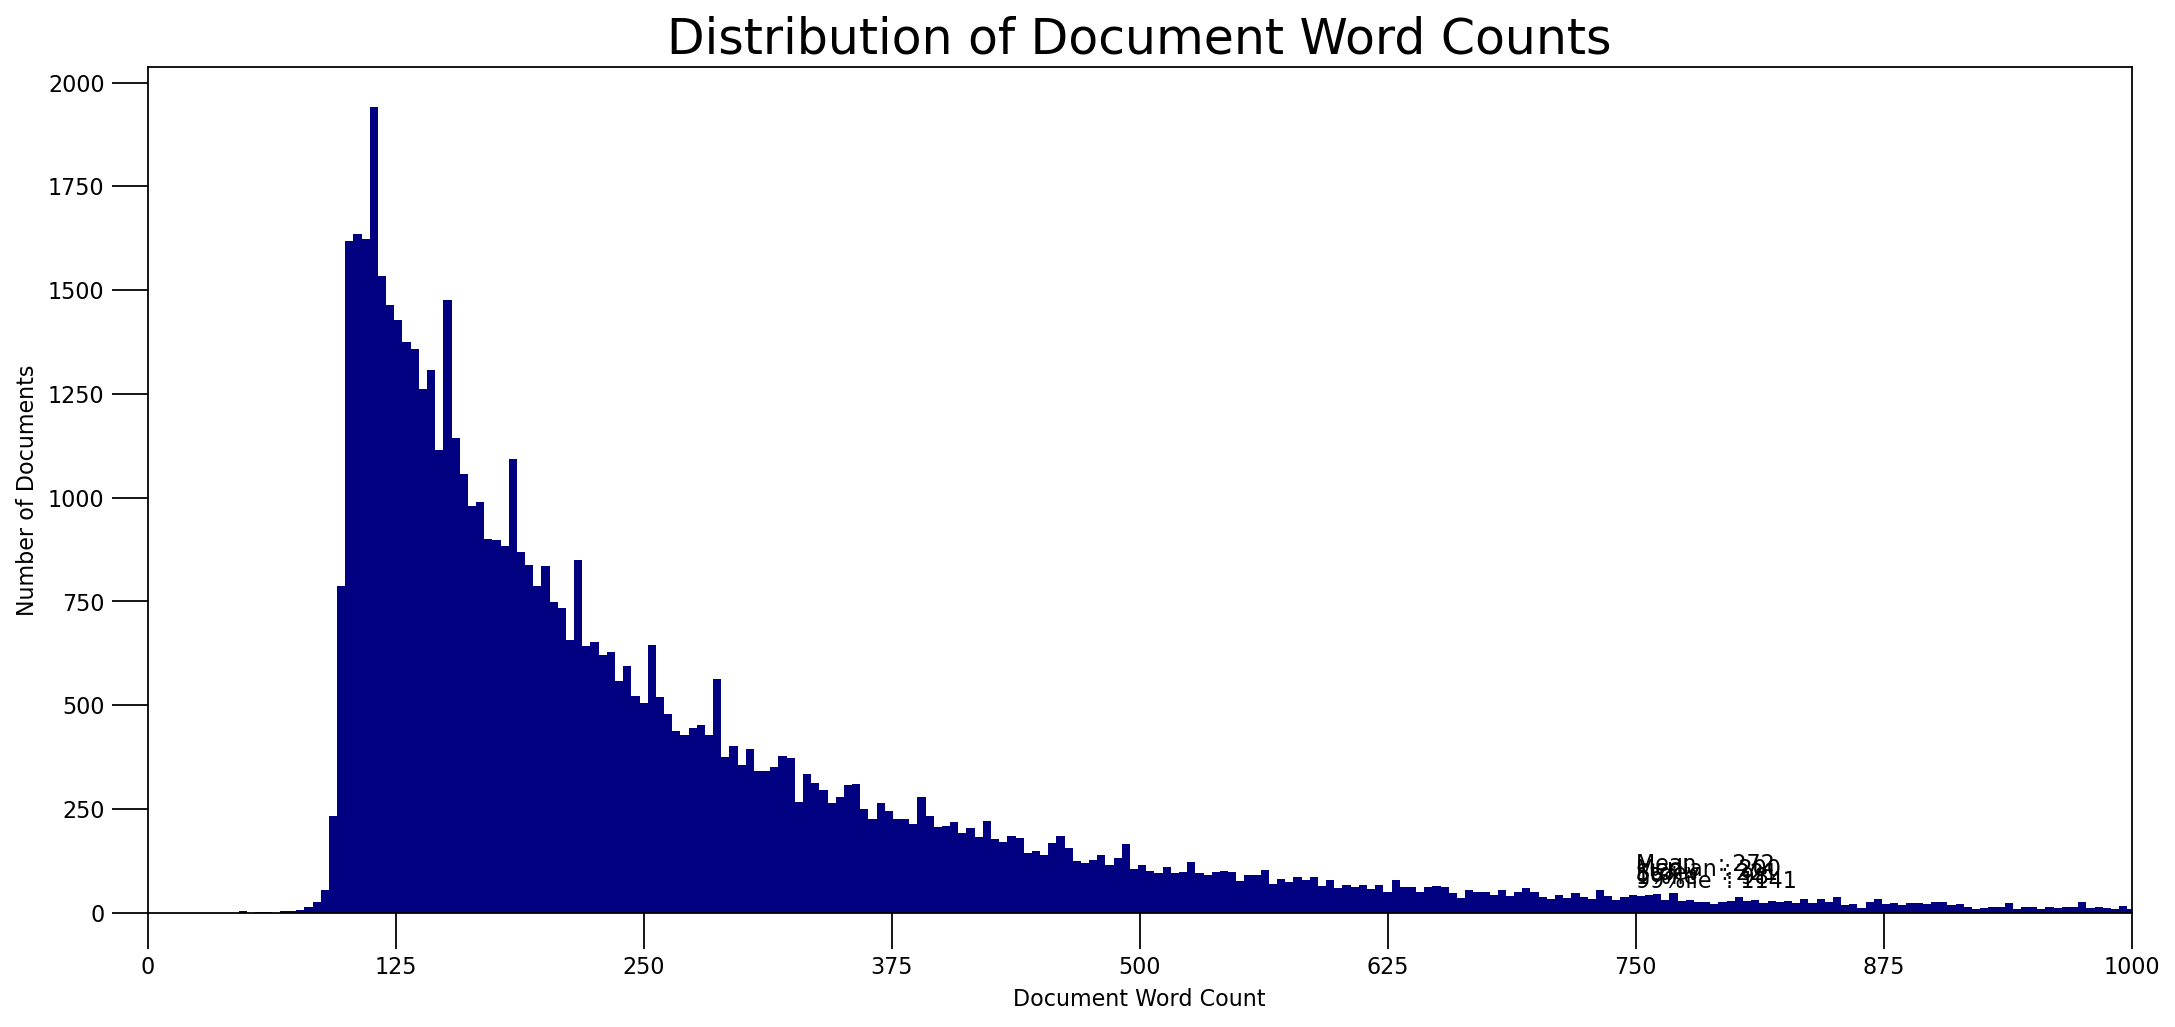

In [29]:
doc_lens = [len(d) for d in data_lemmatized2]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

## TF-IDF преобразование

In [100]:
from gensim.models.tfidfmodel import TfidfModel

In [101]:
tf_idf = gensim.models.tfidfmodel.TfidfModel(corpus=corpus, id2word=id2word, smartirs='afx')

In [32]:
tf_idf.id2word[2]

'аккуратно'

In [33]:
vector = tf_idf[corpus[1]]

In [34]:
vector

[(9, 0.4092961264788298),
 (10, 0.3704550402247837),
 (13, 0.8940253322911204),
 (17, 1.810358604979993),
 (21, 1.052311237806805),
 (24, 3.2046750264293817),
 (27, 1.4315446733932788),
 (36, 0.5949914291771202),
 (39, 0.5553932801298654),
 (41, 1.1706274883498973),
 (43, 0.6950675987208192),
 (44, 1.1535214984738538),
 (51, 0.5872593048502169),
 (54, 2.894293027356723),
 (55, 0.6596321044779793),
 (60, 1.1388837962777607),
 (62, 1.5409583824778137),
 (68, 2.8581032306815186),
 (72, 0.43277241269526),
 (73, 0.8982507888857192),
 (77, 1.0071905529445313),
 (79, 1.7923230848455372),
 (82, 3.9189375057555895),
 (86, 1.7021917375497877),
 (96, 1.6444754514426232),
 (98, 0.7147168127439789),
 (100, 0.3089057726440443),
 (103, 1.0025275922982433),
 (110, 2.0179465966058032),
 (111, 1.1333333333333333),
 (113, 0.18951271172477824),
 (119, 1.671008308361838),
 (128, 1.411089197031968),
 (129, 1.4110370898932791),
 (130, 1.033620200599399),
 (132, 0.5876269802247867),
 (137, 1.413202313809872),

In [102]:
corpus_tfidf = [tf_idf[text] for text in corpus]

In [56]:
corpus_tfidf[:30]

[[(0, 5.1409928231706825),
  (1, 6.245057860170075),
  (2, 4.445680142106087),
  (3, 2.602876818504942),
  (4, 4.557507700734277),
  (5, 7.933174034273653),
  (6, 2.0878849468948615),
  (7, 0.9472443309957617),
  (8, 1.9345707553778955),
  (9, 0.4796438982173787),
  (10, 0.43412700026341844),
  (11, 3.5508052647920865),
  (12, 3.68199742026776),
  (13, 0.6918053166538431),
  (14, 4.3458215478959215),
  (15, 1.344954590288658),
  (16, 3.7207554366563205),
  (17, 1.8386454581828051),
  (18, 5.180555795007108),
  (19, 0.8328830775674679),
  (20, 2.5637441727504235),
  (21, 0.9000030323347673),
  (22, 1.5831356988102327),
  (23, 7.540896464175236),
  (24, 3.254748073717341),
  (25, 2.6348509053762728),
  (26, 1.0361169272857305),
  (27, 1.4539125589150488),
  (28, 1.8394401631466994),
  (29, 1.8345928788316905),
  (30, 2.5292152854730072),
  (31, 1.9697512116752036),
  (32, 3.7018540918313034),
  (33, 2.5004217434486162),
  (34, 2.0893432348175893),
  (35, 1.9809900557191609),
  (36, 0.604

## Построение модели LDA 

In [103]:
lda_model_tfidf = LdaMulticore(corpus=corpus_tfidf,
                        id2word=id2word,
                        num_topics=7, 
                        random_state=100,
                        chunksize=1000,
                        passes=4,
                        batch=False,
                        alpha='asymmetric',
                        eta=None,
                        decay=0.8,
                        offset=1.0,
                        eval_every=10,
                        iterations=70,
                        gamma_threshold=0.002,
                        minimum_probability=0.01,
                        minimum_phi_value=0.01,
per_word_topics=False)

In [104]:
lda_model_tfidf.show_topics()

[(0,
  '0.002*"заявление" + 0.002*"паспорт" + 0.001*"сертификат" + 0.001*"доверенность" + 0.001*"оригинал" + 0.001*"приехать" + 0.001*"подписать" + 0.001*"подпись" + 0.001*"приезжать" + 0.001*"почта"'),
 (1,
  '0.001*"пожалуйста_ожидать_соединение" + 0.001*"семь" + 0.001*"восемь" + 0.001*"номер" + 0.001*"баланс" + 0.001*"организация" + 0.001*"семьдесят" + 0.001*"ноль" + 0.001*"телефон" + 0.001*"отправить"'),
 (2,
  '0.001*"договор" + 0.001*"компания" + 0.001*"время" + 0.001*"программа" + 0.001*"клиент" + 0.001*"свой" + 0.001*"вообще" + 0.001*"вы" + 0.001*"этот" + 0.001*"наш"'),
 (3,
  '0.001*"налоговый" + 0.001*"отчёт" + 0.001*"этот" + 0.001*"программа" + 0.001*"получаться" + 0.001*"файл" + 0.001*"говорить" + 0.001*"вид" + 0.001*"попробовать" + 0.001*"какой-то"'),
 (4,
  '0.001*"отчёт" + 0.001*"ошибка" + 0.001*"организация" + 0.001*"файл" + 0.001*"раздел" + 0.001*"налоговый" + 0.001*"писать" + 0.001*"отчётность" + 0.001*"первый" + 0.001*"ноль"'),
 (5,
  '0.001*"компьютер" + 0.001*"серт

In [105]:
max_topics = [max(map(lambda x: x[0], lda_model_tfidf.get_document_topics(corpus[i]) )) for i, _ in enumerate(corpus)]

In [106]:
len(max_topics)

62072

In [107]:
text_topic_mapping = pd.DataFrame({"file_name": file_names, "topic": max_topics})

In [109]:
text_topic_mapping

file_name  topic
0       1579769179.72238.txt      4
1       1579534063.62363.txt      6
2       1579509983.59048.txt      1
3       1579088437.47050.txt      0
4       1579161966.49942.txt      0
...                      ...    ...
62067  1556196307.242144.txt      5
62068  1556621827.252476.txt      3
62069  1556288216.247176.txt      4
62070  1556283861.246650.txt      6
62071  1556619027.252132.txt      6

[62072 rows x 2 columns]

In [108]:
with open('text_topic_mapping.pkl', 'wb') as f:
    pickle.dump(text_topic_mapping, f)

## Визуализация

In [53]:
gensimvis.prepare(lda_model_tfidf, corpus_tfidf, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.023379 -0.016539       1        1  20.136237
2      0.016445  0.020044       2        1  16.070169
6      0.024554  0.000969       3        1  15.589130
5     -0.017111 -0.018653       4        1  14.956240
3     -0.012687  0.024049       5        1  13.214691
4     -0.026048  0.003710       6        1  12.283217
1     -0.008533 -0.013580       7        1   7.750317, topic_info=                             Term          Freq         Total Category  \
1048              девятьсот_рубль   8426.000000   8426.000000  Default   
1052                    исходящий   9668.000000   9668.000000  Default   
691                       паспорт  15482.000000  15482.000000  Default   
28890  готовый_назвать_специалист   8646.000000   8646.000000  Default   
2212                     входящий  10059.000000  10059.000000  Default   
...                           ...           ...           ...      ...   
36                       говорить   1858.125703  19733.698316   Topic7   
702                    сертификат   1905.287919  24529.581794   Topic7   
242                     сотрудник   1845.627756  19414.805694   Topic7   
51                           день   1846.086502  19564.599049   Topic7   
180                    посмотреть   1842.268089  20011.289228   Topic7   

       logprob  loglift  
1048   30.0000  30.0000  
1052   29.0000  29.0000  
691    28.0000  28.0000  
28890  27.0000  27.0000  
2212   26.0000  26.0000  
...        ...      ...  
36     -7.0734   0.1947  
702    -7.0483   0.0022  
242    -7.0801   0.2042  
51     -7.0799   0.1968  
180    -7.0820   0.1721  

[792 rows x 6 columns], token_table=       Topic      Freq                             Term
term                                                   
54821      2  0.990797                       автотрасса
45416      2  0.022313  агентский_вознаграждение_нажать
45416      3  0.937144  агентский_вознаграждение_нажать
45416      7  0.022313  агентский_вознаграждение_нажать
584        1  0.322663                            адрес
...      ...       ...                              ...
6958       3  0.094512                            ярлык
6958       4  0.520072                            ярлык
6958       5  0.065590                            ярлык
6958       6  0.106907                            ярлык
6958       7  0.084183                            ярлык

[3460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 7, 6, 4, 5, 2])

In [54]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, corpus=corpus_tfidf, texts=data_lemmatized2, dictionary=id2word, coherence='c_v', topn=15)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5047910866891392


In [55]:
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus_tfidf))


Perplexity:  -9.454713714830241


## Подбор оптимального количества тем

In [11]:
num_topics_array = np.arange(8,13,1)
coherence_scores, perplexities, topics = [], [], []

In [12]:
for num_topics in num_topics_array:
    lda_model_tfidf = LdaMulticore(corpus=corpus_tfidf,
                        id2word=id2word,
                        num_topics=num_topics, 
                        random_state=100,
                        chunksize=1000,
                        passes=4,
                        batch=False,
                        alpha='asymmetric',
                        eta=None,
                        decay=0.8,
                        offset=1.0,
                        eval_every=10,
                        iterations=70,
                        gamma_threshold=0.002,
                        minimum_probability=0.01,
                        minimum_phi_value=0.01,
                        per_word_topics=False)
    coherence_model_lda = CoherenceModel(model=lda_model_tfidf, 
                                         corpus=corpus_tfidf, 
                                         texts=data_lemmatized2, 
                                         dictionary=id2word, 
                                         coherence='c_v', 
                                         topn=15)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    perplexities.append(lda_model_tfidf.log_perplexity(corpus_tfidf))
    topics.append(lda_model_tfidf.print_topics())
    

In [13]:
coherence_scores

[0.4125476824490261,
 0.3988590161867951,
 0.38981893021088343,
 0.4127370354846001,
 0.4078726855924793]

In [14]:
perplexities

[-9.519792631924169,
 -9.509527424741545,
 -9.579040541280081,
 -9.602474976894307,
 -9.546142044985382]